In [176]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE

Import of CSV Files

In [177]:
# Alterar o endereço aqui para o endereço dos arquivos no seu computador.
train_dataset = pd.read_csv("/content/desafio_manutencao_preditiva_treino.csv")
test_dataset =  pd.read_csv("/content/desafio_manutencao_preditiva_teste.csv")

# EDA



In [178]:
train_dataset.head()

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type
0,1,M14860,M,298.1,308.6,1551,42.8,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,No Failure
2,5,L47184,L,298.2,308.7,1408,40.0,9,No Failure
3,6,M14865,M,298.1,308.6,1425,41.9,11,No Failure
4,7,L47186,L,298.1,308.6,1558,42.4,14,No Failure


In [179]:
# since the target is the failure_type, this will be a multiclass classification problem with
train_dataset['failure_type'].unique()


array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [180]:
train_dataset.describe()

# we can see that there's 3 categorical variables and 5(excluding ID) numerical variables

,udi,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
count,6667.000000,6667.000000,6667.000000,6667.000000,6667.000000,6667.000000
mean,4994.589921,299.992515,309.992620,1537.419529,40.058512,108.098095
std,2896.125718,1.994710,1.488101,177.182908,9.950804,63.359915
min,1.000000,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,2496.500000,298.300000,308.800000,1422.500000,33.200000,54.000000
50%,4983.000000,300.000000,310.000000,1503.000000,40.200000,108.000000
75%,7510.500000,301.500000,311.100000,1612.000000,46.800000,162.000000
max,10000.000000,304.500000,313.800000,2886.000000,76.600000,251.000000


In [181]:
# we can drop the udi variable, since it has no use for classification or statistical value its just an ID
train_dataset.drop(['udi','product_id'], inplace = True,axis=1)
# also we can check if theres nan or empty values
print(train_dataset.isnull().any())
print(train_dataset.isnull().sum())

type                     False
air_temperature_k        False
process_temperature_k    False
rotational_speed_rpm     False
torque_nm                False
tool_wear_min            False
failure_type             False
dtype: bool
type                     0
air_temperature_k        0
process_temperature_k    0
rotational_speed_rpm     0
torque_nm                0
tool_wear_min            0
failure_type             0
dtype: int64


In [182]:
# check if the dataset has dropped
train_dataset.head()

,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type
0,M,298.1,308.6,1551,42.8,0,No Failure
1,L,298.2,308.7,1408,46.3,3,No Failure
2,L,298.2,308.7,1408,40.0,9,No Failure
3,M,298.1,308.6,1425,41.9,11,No Failure
4,L,298.1,308.6,1558,42.4,14,No Failure


In [183]:
# check all the target labels
train_dataset['failure_type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

Plote the distribution graph for all the numerical variables

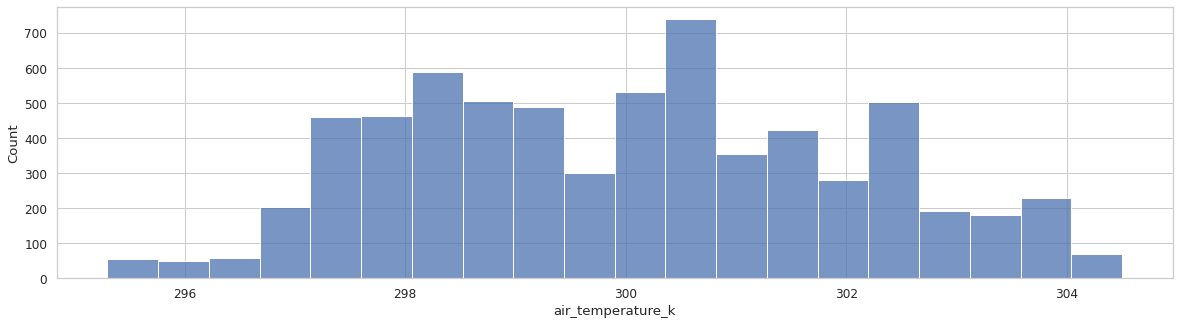

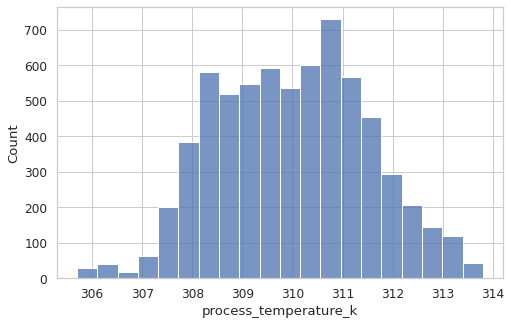

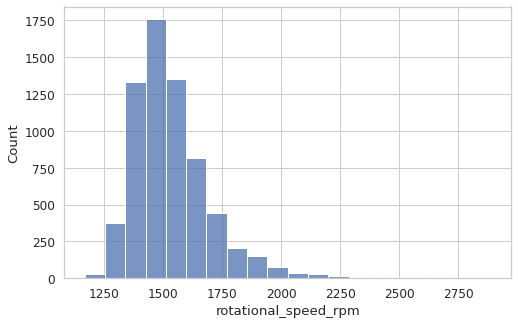

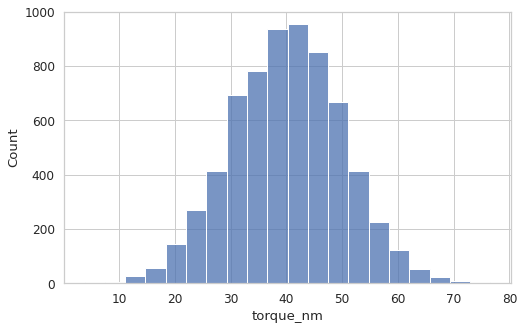

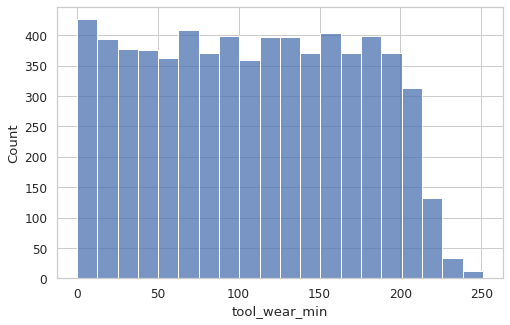

In [184]:
for i,column in enumerate(train_dataset):

  if train_dataset[column].dtype in ['int64','float64'] and column != "udi":
    plt.figure(i)
    sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
    sns.histplot(
    train_dataset[column], kde=False, bins=20,
    ).set(xlabel=column, ylabel='Count');


Rotational_Speed_rpm show a right skewd distribution. Others variables has a distribution that wont cause problems in the classification/regression phase


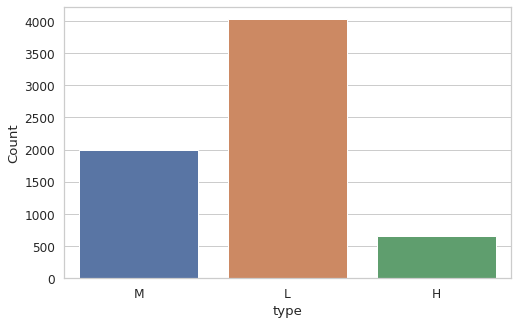

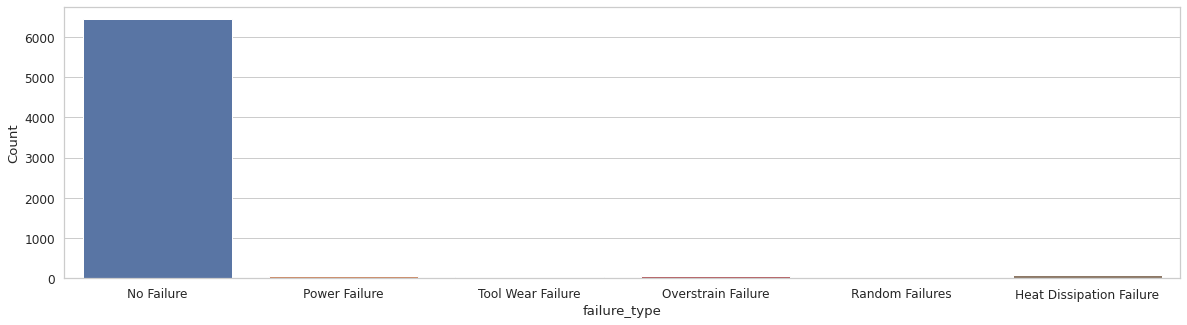

In [185]:
for i,column in enumerate(train_dataset):
  if train_dataset[column].dtype =="object" :
    plt.figure(i)
    sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [20, 5]})
    sns.countplot(x =
    train_dataset[column]
    ).set(xlabel=column, ylabel='Count');

From ploting the data we can see a huge disbalance in data. this will affect the ML algorithm, probably will use some data augmentation method


In [186]:
# transform the categorical variabels into numerical
target_encoding= {
    'No Failure': 0,
     'Power Failure':1,
      'Tool Wear Failure':2,
       'Overstrain Failure':3,
        'Random Failures':4,
       'Heat Dissipation Failure': 5}
type_encoding = {
    'L':0,
    'M':1,
    'H':2}

def categorial_to_numerical_simple_encoder(df,test=False):
  if not test:
    for key in target_encoding.keys():
      df['failure_type'].replace(key,target_encoding[key], inplace = True)
  for key in type_encoding.keys():
    df['type'].replace(key,type_encoding[key], inplace = True)


Plote the boxplot between the failure_type and each variable

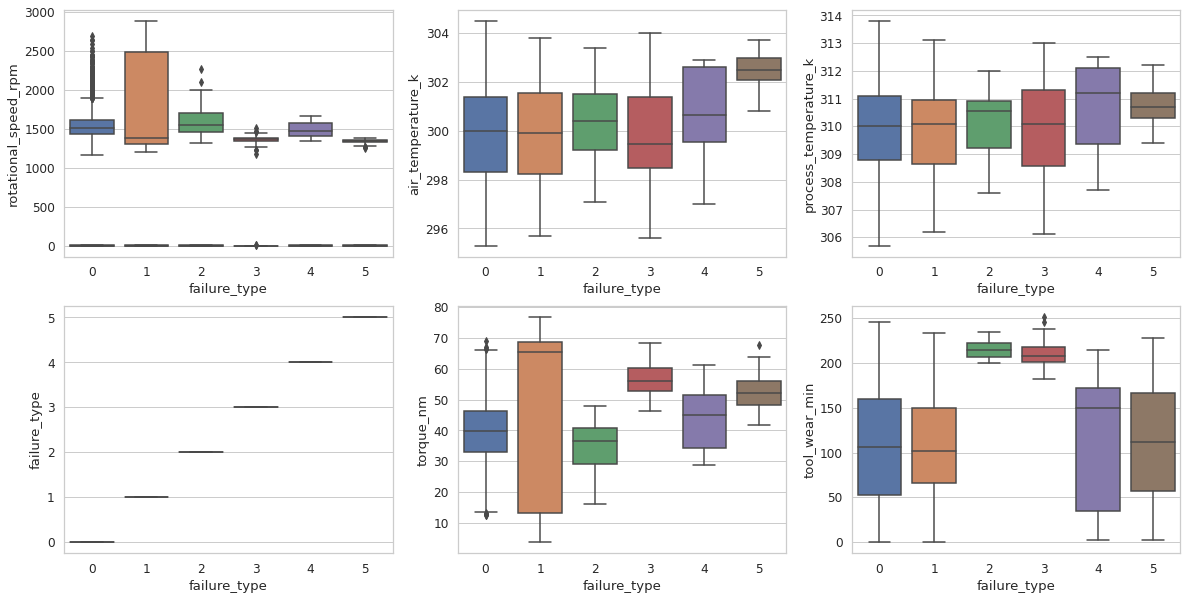

In [187]:

categorial_to_numerical_simple_encoder(train_dataset)

fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for i, col in enumerate(train_dataset.columns):
    sns.boxplot(x="failure_type", y=col, data=train_dataset, ax=ax[i//4][i%3])

from the box plots, we can see that the Power Failure occurs when there's high RPM and high torque, wich are high correlated variables, the type Tool Wear Failure and Overstrain Failure happens with high tool wear but they differ from each other in the torque. the Heat Dissipation Failure occurs with at high temps. And random failures is hard to predict because it happens at any condition.

From these graphics we can say that the all select variables will hold valuable information to indentify the types of failure.

#DATA PREPARATION FOR MACHINE LEARNING

The dataset is unbalanced!!!
I'll be using SMOTENC, since this is a problem that envolves continuos and nominal variables to try to balance things out and improve the classifier performance
I'm using SMOTENC instead of SMOTE because there's numerical and categorical values, and the normal smote could interpratate the categorial ones that are transformed to integer, and create wrong data, for example 0.3, 0.5, that does not represent any categorical data.

In [188]:
X_train = train_dataset.loc[:,train_dataset.columns != 'failure_type']
y_train = train_dataset.loc[:,train_dataset.columns == 'failure_type']


In [189]:
#smote
from imblearn.over_sampling import SMOTENC
sm = SMOTENC([0])
print(X_train.shape)
print(y_train.shape)
X_res, y_res = sm.fit_resample(X_train, y_train)
print(X_res.shape)
print(y_res.shape)


(6667, 6)
(6667, 1)
(38610, 6)
(38610, 1)


In [190]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

To evaluate the predict model, i'll be spliting the train data into train and test dataset to evaluate the model.

For the classification model, i'll be using the RandomForest Classifier; Ideally, i'd build different models and choose the best one. but I'm and advocate of using RandomForest, because it yields good results, it's an ensemble of homogenous classifier and is fast.

In [191]:
X_trains, X_tests, y_trains, y_tests = train_test_split(X_train,y_train,test_size=.3, random_state=42)
y_trains = y_trains['failure_type']
y_tests = y_tests['failure_type']
rf = RandomForestClassifier(criterion='entropy')
# X_res, y_res = sm.fit_resample(X_trains, y_trains)
rf.fit(X_trains,y_trains)

predicted = rf.predict(X_tests)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(predicted, y_tests))
print(rf.score(X_tests,y_tests))
print(f1_score(y_tests,predicted,average='weighted'))


[[1931    6    7    3    4    9]
 [   3   11    0    1    0    0]
 [   0    0    0    0    0    0]
 [   0    2    0   12    0    0]
 [   0    0    0    0    0    0]
 [   0    0    0    0    0   12]]
0.9825087456271864
0.9787474642388161


It was used the metric F1 score and accuracy, once that as the dataset has an unbalancing, the accuracy metric can have a bias for hitting all in the majority class and miss in the others. The f1 score takes into account the precision and recall and allows the analysis of the result in all classes, even with unbalance, it can be seen that the model has a high hit rate and a great performance.

In [192]:
# build model on the full data and test on the test dataset
!pip freeze > /content/requirements.txt

# Building a "production" model

In [193]:
#preparing the test data.
categorial_to_numerical_simple_encoder(test_dataset,test=True)
test_dataset.drop(['udi','product_id'], inplace = True,axis=1)
X_test_production =  test_dataset

Training the production model with all the training data

In [194]:
rf_production = RandomForestClassifier(criterion='entropy')
# print(y_train)
rf_production.fit(X_train,y_train['failure_type'])
predicted_production = rf_production.predict(X_test_production)
with open('/content/predicted.csv','w',encoding='utf-8') as file:
  file.write('rowNumber, predictedValues\n')
  for i,value in enumerate(predicted_production):
    file.write(f'{i},{list(target_encoding.keys())[list(target_encoding.values()).index(int(value))]}\n')